# Setup

In [9]:
# import your standard packages
%run pkgs.py
%run pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [10]:
figpath = '../figures/'

## Read Data

In [11]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
# ds_SLA


In [12]:
# SLA
ds_SLA_ia = xr.open_dataset('../data/sla_to_wod.nc')
# ds_SLA_ia

In [13]:
# WOD
ds_WOD = xr.open_dataset('../data/wod_coastal_processed.nc')
# ds_WOD


In [14]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_coastal_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                (month_eAS: 1200, month_eBoB: 1632, month_wAS: 672, month_wBoB: 288)
Coordinates:
  * month_wAS              (month_wAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_eAS              (month_eAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_wBoB             (month_wBoB) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_eBoB             (month_eBoB) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
Data variables:
    lat_wAS                (month_wAS) float64 ...
    lon_wAS                (month_wAS) float64 ...
    mon_wAS                (month_wAS) float64 ...
    lat_eAS                (month_eAS) float64 ...
    lon_eAS                (month_eAS) float64 ...
    mon_eAS                (month_eAS) float64 ...
    lat_wBoB               (month_wBoB) float64 ...
    lon_wBoB               (month_wBoB) float64 ...
    mon_wBoB               (month_wBoB) float64 ...
    lat_eBoB               (month_eBoB) float64 ...
    lon_eBoB               (mo

# Oxygen vs SLA

6.644335080011249e-25 0.6128496343925349
6.6443350800109985e-25 0.6128496343925351
4.15268336219467e-98 0.580025663638337
4.152683362190858e-98 0.5800256636383365
7.105299376883388e-08 0.4011328010277671
7.105299376883404e-08 0.40113280102776705
6.275992275380213e-24 0.3001929261004623
6.275992275372038e-24 0.3001929261004624
3.2716883121678515e-22 0.6127636004561622
3.2716883121679197e-22 0.6127636004561623
1.3643326110625593e-46 0.4824050462787218
1.3643326110639264e-46 0.482405046278721
1.2729079439011074e-17 0.7872198979765879
1.2729079439010154e-17 0.7872198979765883
4.740409423709913e-23 0.5299444119773802
4.740409423708784e-23 0.5299444119773804


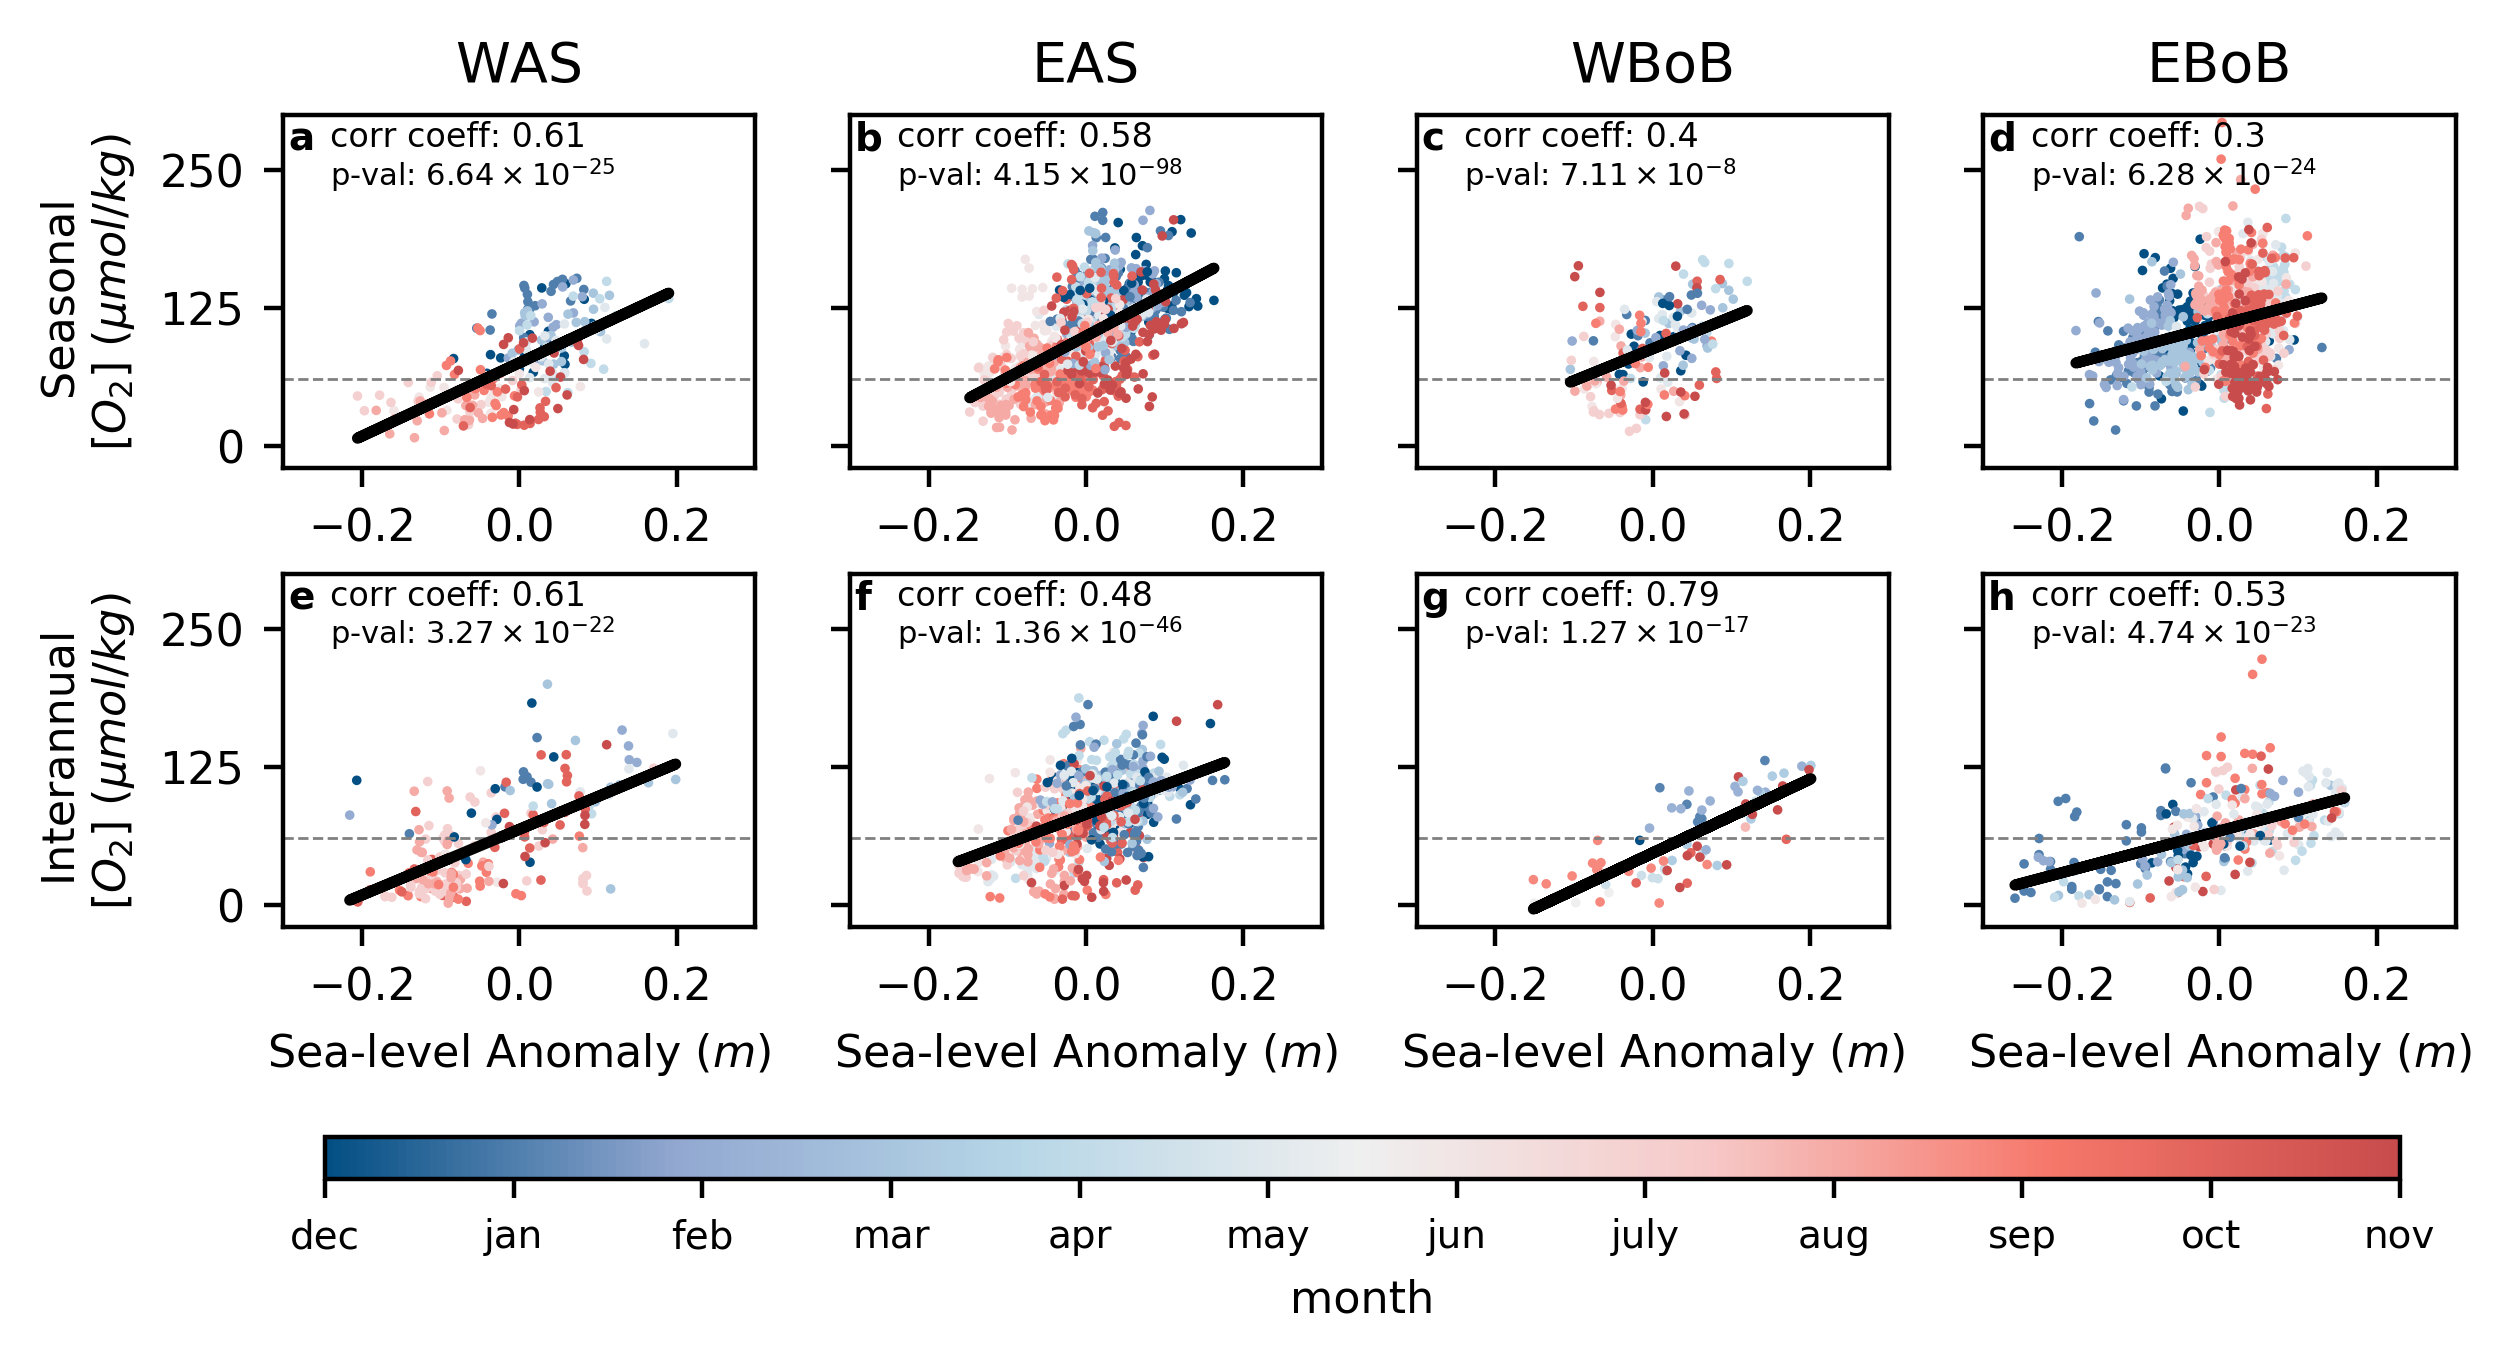

In [17]:
depth = '50_200'
Depth = '50-200'

############################################################################
doxy_wAS = ds_WOA['doxy_wAS_' + depth]
doxy_eAS = ds_WOA['doxy_eAS_' + depth]
doxy_wBoB = ds_WOA['doxy_wBoB_' + depth]
doxy_eBoB = ds_WOA['doxy_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

mon_wAS = ds_WOA['mon_wAS']
mon_eAS = ds_WOA['mon_eAS']
mon_wBoB = ds_WOA['mon_wBoB']
mon_eBoB = ds_WOA['mon_eBoB']

# seas_wAS = ds_WOA['seas_wAS']
# seas_eAS = ds_WOA['seas_eAS']
# seas_wBoB = ds_WOA['seas_wBoB']
# seas_eBoB = ds_WOA['seas_eBoB']

doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

mon_wAS_ia = ds_WOD['mon_wAS']
mon_eAS_ia = ds_WOD['mon_eAS']
mon_wBoB_ia = ds_WOD['mon_wBoB']
mon_eBoB_ia = ds_WOD['mon_eBoB']

seas_wAS_ia = ds_WOD['seas_wAS']
seas_eAS_ia = ds_WOD['seas_eAS']
seas_wBoB_ia = ds_WOD['seas_wBoB']
seas_eBoB_ia = ds_WOD['seas_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3.5),dpi=400)

sz = 3
fsz = 6
lfz = 7
lw = 2
alpha = 1


xlim = [-0.3,0.3]
ylim = [-20,300]

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(doxy_wAS)
p = ax.scatter(sla_wAS[~ind],doxy_wAS[~ind],c = mon_wAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n[$O_2$] ($\mu mol/ kg$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)

ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(doxy_eAS)
p = ax.scatter(sla_eAS[~ind],doxy_eAS[~ind],c = mon_eAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)  

ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(sla_wBoB[~ind],doxy_wBoB[~ind],c = mon_wBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)  

ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(doxy_eBoB)
p = ax.scatter(sla_eBoB[~ind],doxy_eBoB[~ind],c = mon_eBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)

#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(doxy_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],doxy_wAS_ia[~ind],c = mon_wAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], doxy_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],doxy_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_ylabel('Interannual \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)

ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(doxy_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],doxy_eAS_ia[~ind],c = mon_eAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], doxy_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],doxy_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)

ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(doxy_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],doxy_wBoB_ia[~ind],c = mon_wBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], doxy_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],doxy_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)

ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(doxy_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],doxy_eBoB_ia[~ind],c = mon_eBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind], doxy_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],doxy_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0,125,250])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.9, fontsize = lfz)
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.8, fontsize = fsz-0.5)

mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, 0.12, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')
cbar.ax.tick_params(labelsize = 7)

plt.subplots_adjust(hspace = 0.3, bottom = 0.3)

plt.savefig(figpath + 'corr_doxy_sla_' + depth + '.pdf', format='pdf', dpi = 400)



# Temperature vs SLA

3.624065392604882e-51 0.795943980910015
3.624065392603993e-51 0.7959439809100155
1.4463217478794863e-197 0.7522749303613394
1.4463217478773818e-197 0.7522749303613394
2.4600682284229777e-13 0.5259513492211453
2.4600682284229833e-13 0.5259513492211452
6.945239364659688e-53 0.4420576682637426
6.945239364651173e-53 0.4420576682637425
0.0 0.6305098221997452
0.0 0.630509822199745
0.0 0.4770764327007704
0.0 0.47707643270077016
1.873279522972081e-145 0.5842516944155673
1.8732795229721734e-145 0.5842516944155673
0.0 0.41244312003741057
0.0 0.4124431200374105


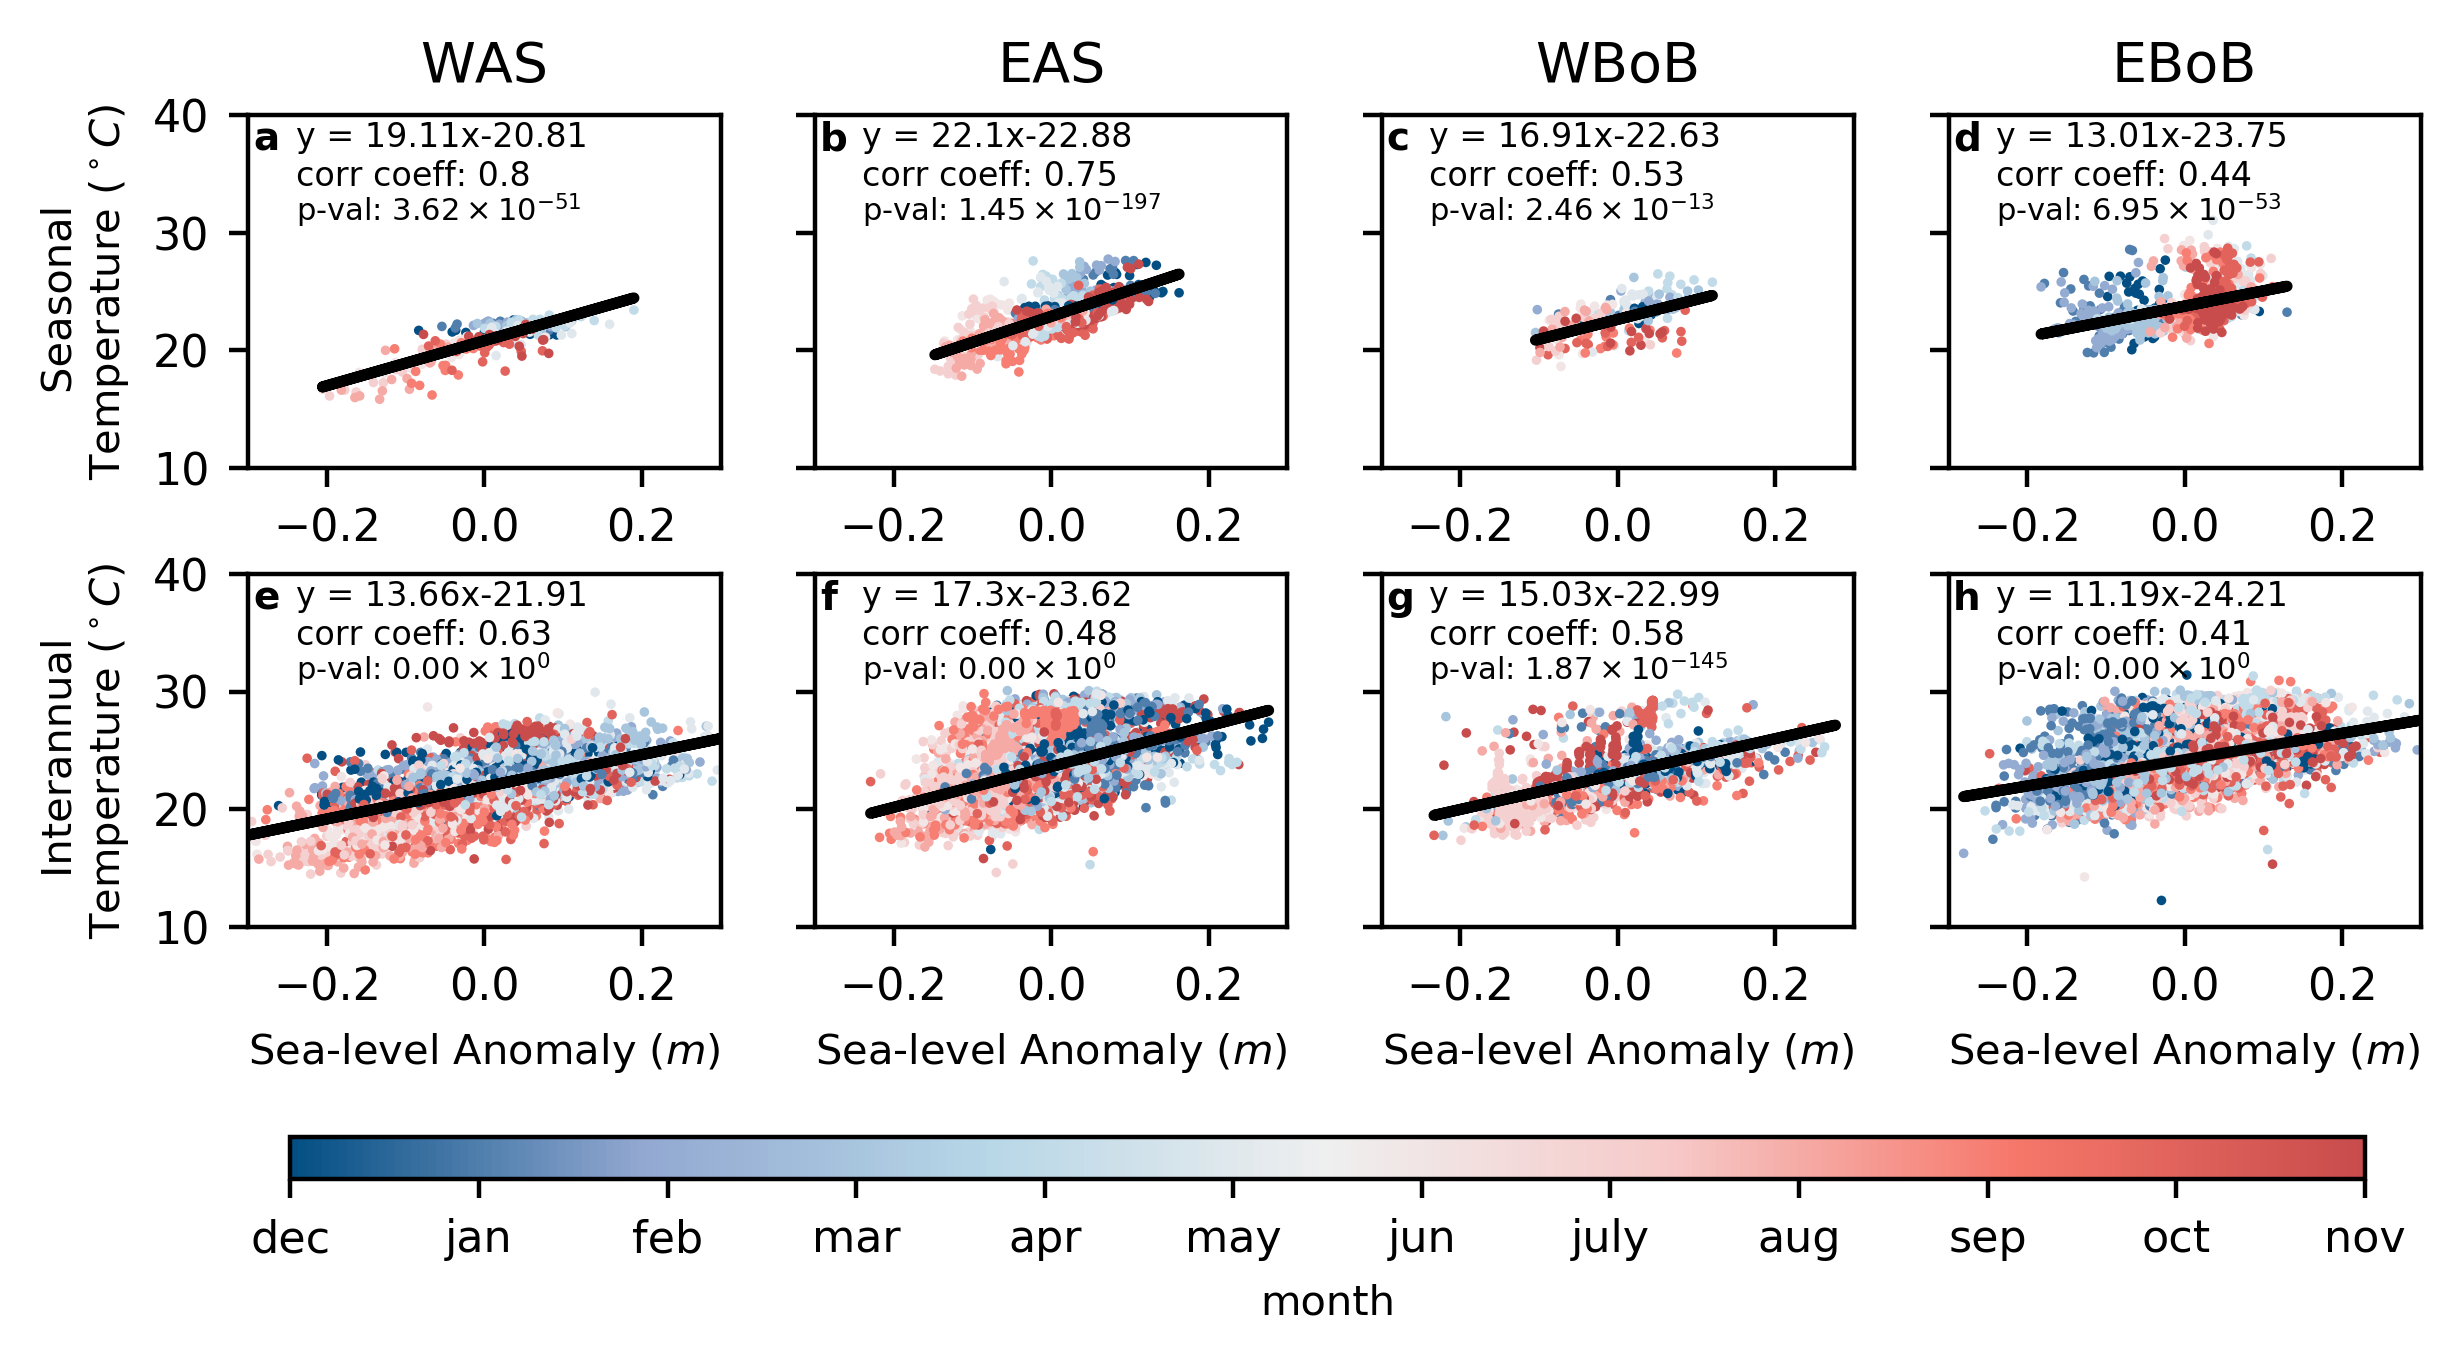

In [16]:
depth = '50_200'
Depth = '50-200'

temp_wAS = ds_WOA['temp_wAS_' + depth]
temp_eAS = ds_WOA['temp_eAS_' + depth]
temp_wBoB = ds_WOA['temp_wBoB_' + depth]
temp_eBoB = ds_WOA['temp_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

mon_wAS = ds_WOA['mon_wAS']
mon_eAS = ds_WOA['mon_eAS']
mon_wBoB = ds_WOA['mon_wBoB']
mon_eBoB = ds_WOA['mon_eBoB']

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

mon_wAS_ia = ds_WOD['mon_wAS']
mon_eAS_ia = ds_WOD['mon_eAS']
mon_wBoB_ia = ds_WOD['mon_wBoB']
mon_eBoB_ia = ds_WOD['mon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3.5),dpi=400)

sz = 3
fsz = 6
lfz = 7
lw = 2
alpha = 1


xlim = [-0.3,0.3]
ylim = [14,40]

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(temp_wAS)
p = ax.scatter(sla_wAS[~ind],temp_wAS[~ind],c = mon_wAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],temp_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],temp_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_title('WAS')
ax.set_ylabel('Seasonal \nTemperature ($^\circ C$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(temp_eAS)
p = ax.scatter(sla_eAS[~ind],temp_eAS[~ind],c = mon_eAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],temp_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],temp_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(temp_wBoB)
p = ax.scatter(sla_wBoB[~ind],temp_wBoB[~ind],c = mon_wBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],temp_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],temp_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(temp_eBoB)
p = ax.scatter(sla_eBoB[~ind],temp_eBoB[~ind],c = mon_eBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],temp_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],temp_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(temp_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],temp_wAS_ia[~ind],c = mon_wAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], temp_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],temp_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_ylabel('Interannual \nTemperature ($^\circ C$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(temp_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],temp_eAS_ia[~ind],c = mon_eAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], temp_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],temp_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],temp_wBoB_ia[~ind],c = mon_wBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], temp_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],temp_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(temp_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],temp_eBoB_ia[~ind],c = mon_eBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind], temp_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],temp_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, 0.12, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')

plt.subplots_adjust(hspace = 0.3, bottom = 0.3)

plt.savefig(figpath + 'corr_temp_sla_' + depth + '.pdf', format='pdf', dpi = 400)



# Temperature vs Doxy

In [ ]:
depth = '50_200'
Depth = '50-200'

doxy_wAS = ds_WOA['doxy_wAS_' + depth]
doxy_eAS = ds_WOA['doxy_eAS_' + depth]
doxy_wBoB = ds_WOA['doxy_wBoB_' + depth]
doxy_eBoB = ds_WOA['doxy_eBoB_' + depth]

temp_wAS = ds_WOA['temp_wAS_' + depth]
temp_eAS = ds_WOA['temp_eAS_' + depth]
temp_wBoB = ds_WOA['temp_wBoB_' + depth]
temp_eBoB = ds_WOA['temp_eBoB_' + depth]

O2_sat_wAS = ds_WOA['O2_sat_wAS_' + depth]
O2_sat_eAS = ds_WOA['O2_sat_eAS_' + depth]
O2_sat_wBoB = ds_WOA['O2_sat_wBoB_' + depth]
O2_sat_eBoB = ds_WOA['O2_sat_eBoB_' + depth]

doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

O2_sat_wAS_ia = ds_WOD['O2_sat_wAS_' + depth]
O2_sat_eAS_ia = ds_WOD['O2_sat_eAS_' + depth]
O2_sat_wBoB_ia = ds_WOD['O2_sat_wBoB_' + depth]
O2_sat_eBoB_ia = ds_WOD['O2_sat_eBoB_' + depth]

mon_wAS_ia = ds_WOD['mon_wAS']
mon_eAS_ia = ds_WOD['mon_eAS']
mon_wBoB_ia = ds_WOD['mon_wBoB']
mon_eBoB_ia = ds_WOD['mon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3.5),dpi=400)

sz = 3
fsz = 6
lfz = 7
lw = 2
alpha = 1
sat_clr = 'lightgray'


xlim = [14,30]
ylim = [-20,400]

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(temp_wAS) | np.isnan(doxy_wAS)
p = ax.scatter(temp_wAS[~ind],doxy_wAS[~ind],c = mon_wAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
ax.scatter(temp_wAS[~ind],O2_sat_wAS[~ind],c = sat_clr,s= sz)
m, b, r, p_val,_ = stats.linregress(temp_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
ax.plot(temp_wAS[~ind], m*temp_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Seasonal \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(242)
ind = np.isnan(temp_eAS) | np.isnan(doxy_eAS)
p = ax.scatter(temp_eAS[~ind],doxy_eAS[~ind],c = mon_eAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.scatter(temp_eAS[~ind],O2_sat_eAS[~ind],c = sat_clr,s= sz)
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(temp_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
ax.plot(temp_eAS[~ind], m*temp_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
ax.set_xlabel('Seasonal \nTemperature ($^\circ C$)')
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(243)
ind = np.isnan(temp_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(temp_wBoB[~ind],doxy_wBoB[~ind],c = mon_wBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.scatter(temp_wBoB[~ind],O2_sat_wBoB[~ind],c = sat_clr,s= sz)
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
ax.plot(temp_wBoB[~ind], m*temp_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
ax.set_xlabel('Seasonal \nTemperature ($^\circ C$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(244)
ind = np.isnan(temp_eBoB) | np.isnan(doxy_eBoB)
p = ax.scatter(temp_eBoB[~ind],doxy_eBoB[~ind],c = mon_eBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.scatter(temp_eBoB[~ind],O2_sat_eBoB[~ind],c = sat_clr,s= sz)
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
ax.plot(temp_eBoB[~ind], m*temp_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
ax.set_xlabel('Seasonal \nTemperature ($^\circ C$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(temp_wAS_ia) | np.isnan(doxy_wAS_ia)
ax.scatter(temp_wAS_ia[~ind],doxy_wAS_ia[~ind],c = mon_wAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
ax.scatter(temp_wAS_ia[~ind],O2_sat_wAS_ia[~ind],c = sat_clr,s= sz)
m, b, r, p_val,_ =stats.linregress(temp_wAS_ia[~ind], doxy_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wAS_ia[~ind],doxy_wAS_ia[~ind])
print(p_val,r)
ax.plot(temp_wAS_ia[~ind], m*temp_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Interannual \nTemperature ($^\circ C$)')
add_letter(ax, 'e', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(246)
ind = np.isnan(temp_eAS_ia) | np.isnan(doxy_eAS_ia)
ax.scatter(temp_eAS_ia[~ind],doxy_eAS_ia[~ind],c = mon_eAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.scatter(temp_eAS_ia[~ind],O2_sat_eAS_ia[~ind],c = sat_clr,s= sz)
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_eAS_ia[~ind], doxy_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eAS_ia[~ind],doxy_eAS_ia[~ind])
print(p_val,r)
ax.plot(temp_eAS_ia[~ind], m*temp_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Interannual \nTemperature ($^\circ C$)')
add_letter(ax, 'f', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(247)
ind = np.isnan(temp_wBoB_ia) | np.isnan(doxy_wBoB_ia)
ax.scatter(temp_wBoB_ia[~ind],doxy_wBoB_ia[~ind],c = mon_wBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.scatter(temp_wBoB_ia[~ind],O2_sat_wBoB_ia[~ind],c = sat_clr,s= sz)
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB_ia[~ind], doxy_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wBoB_ia[~ind],doxy_wBoB_ia[~ind])
print(p_val,r)
ax.plot(temp_wBoB_ia[~ind], m*temp_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Interannual \nTemperature ($^\circ C$)')
add_letter(ax, 'g', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(248)
ind = np.isnan(temp_eBoB_ia) | np.isnan(doxy_eBoB_ia)
ax.scatter(temp_eBoB_ia[~ind],doxy_eBoB_ia[~ind],c = mon_eBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.scatter(temp_eBoB_ia[~ind],O2_sat_eBoB_ia[~ind],c = sat_clr,s= sz)
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_eBoB_ia[~ind], doxy_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eBoB_ia[~ind],doxy_eBoB_ia[~ind])
print(p_val,r)
ax.plot(temp_eBoB_ia[~ind], m*temp_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Interannual \nTemperature ($^\circ C$)')
add_letter(ax, 'h', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, 0.12, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')

plt.subplots_adjust(hspace = 0.3, bottom = 0.35)

plt.savefig(figpath + 'corr_doxy_temp_' + depth + '.pdf', format='pdf', dpi = 400)



# Spatial Map of Points Used for Correlations

In [ ]:
depth = '50_200'
Depth = '50-200'

doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

lat_wAS_ia = ds_SLA_ia['lat_wAS']
lat_eAS_ia = ds_SLA_ia['lat_eAS']
lat_wBoB_ia = ds_SLA_ia['lat_wBoB']
lat_eBoB_ia = ds_SLA_ia['lat_eBoB']

lon_wAS_ia = ds_SLA_ia['lon_wAS']
lon_eAS_ia = ds_SLA_ia['lon_eAS']
lon_wBoB_ia = ds_SLA_ia['lon_wBoB']
lon_eBoB_ia = ds_SLA_ia['lon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8/2.54,1.5),dpi=400)

sz = 1.5
sq_sz = 60
fsz = 12
alpha = 0.25
lfz = 6

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 6,
         'axes.labelsize': 8,
         'axes.titlesize': 8,
         'xtick.labelsize':6,
         'ytick.labelsize':6}

pylab.rcParams.update(params)

##############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
ind = np.isnan(sla_wAS_ia) | np.isnan(temp_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eAS_ia) | np.isnan(temp_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g', marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eBoB_ia) | np.isnan(temp_eBoB_ia)
p = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='r', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ax.set_title('Temperature & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz)

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ind = np.isnan(sla_wAS_ia) | np.isnan(doxy_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k',marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eAS_ia) | np.isnan(doxy_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g',marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB_ia) | np.isnan(doxy_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eBoB_ia) | np.isnan(doxy_eBoB_ia)
lep = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='r', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ax.set_title('Oxygen & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.ylabels_left = False
add_letter(ax, 'b', x = 0.01,y=0.94, fontsize = lfz)

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
ind = np.isnan(doxy_wAS_ia) | np.isnan(temp_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', marker = '.',
               edgecolor = 'none', s = sz,transform=ccrs.PlateCarree(), label = 'WAS')
ind = np.isnan(doxy_eAS_ia) | np.isnan(temp_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g',  marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree(), label = 'EAS')
ind = np.isnan(doxy_wBoB_ia) | np.isnan(temp_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b',  marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree(), label = 'WBoB')
ind = np.isnan(doxy_eBoB_ia) | np.isnan(temp_eBoB_ia)
p = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='r',  marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree(), label = 'EBoB')
ax.set_title('Temperature & Oxygen Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.ylabels_left = False
add_letter(ax, 'c', x = 0.01,y=0.94, fontsize = lfz)

plt.subplots_adjust(wspace = 0.1)
plt.legend(markerscale=5, ncol = 2, loc = 'upper right')

plt.savefig(figpath + 'corr_doxy_temp_sla_loc_map.pdf', format='pdf', dpi = 400)

# Nitrate vs SLA

In [ ]:
depth = '50_200'
Depth = '50-200'

nitrate_wAS = ds_WOA['nitrate_wAS_' + depth]
nitrate_eAS = ds_WOA['nitrate_eAS_' + depth]
nitrate_wBoB = ds_WOA['nitrate_wBoB_' + depth]
nitrate_eBoB = ds_WOA['nitrate_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

mon_wAS = ds_WOA['mon_wAS']
mon_eAS = ds_WOA['mon_eAS']
mon_wBoB = ds_WOA['mon_wBoB']
mon_eBoB = ds_WOA['mon_eBoB']

nitrate_wAS_ia = ds_WOD['nitrate_wAS_' + depth]
nitrate_eAS_ia = ds_WOD['nitrate_eAS_' + depth]
nitrate_wBoB_ia = ds_WOD['nitrate_wBoB_' + depth]
nitrate_eBoB_ia = ds_WOD['nitrate_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

mon_wAS_ia = ds_WOD['mon_wAS']
mon_eAS_ia = ds_WOD['mon_eAS']
mon_wBoB_ia = ds_WOD['mon_wBoB']
mon_eBoB_ia = ds_WOD['mon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3.5),dpi=400)

sz = 3
fsz = 6
lfz = 7
lw = 2
alpha = 1


xlim = [-0.3,0.3]
ylim = [-5,40]

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(nitrate_wAS)
p = ax.scatter(sla_wAS[~ind],nitrate_wAS[~ind],c = mon_wAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],nitrate_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],nitrate_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n[$NO_3$] ($\mu mol/ kg$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(nitrate_eAS)
p = ax.scatter(sla_eAS[~ind],nitrate_eAS[~ind],c = mon_eAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],nitrate_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],nitrate_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(nitrate_wBoB)
p = ax.scatter(sla_wBoB[~ind],nitrate_wBoB[~ind],c = mon_wBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],nitrate_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],nitrate_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(nitrate_eBoB)
p = ax.scatter(sla_eBoB[~ind],nitrate_eBoB[~ind],c = mon_eBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],nitrate_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],nitrate_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(nitrate_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],nitrate_wAS_ia[~ind],c = mon_wAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], nitrate_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],nitrate_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n[$NO_3$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(nitrate_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],nitrate_eAS_ia[~ind],c = mon_eAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], nitrate_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],nitrate_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(nitrate_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],nitrate_wBoB_ia[~ind],c = mon_wBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], nitrate_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],nitrate_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(nitrate_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],nitrate_eBoB_ia[~ind],c = mon_eBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind], nitrate_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],nitrate_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, 0.12, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')

plt.subplots_adjust(hspace = 0.3, bottom = 0.3)

plt.savefig(figpath + 'corr_nitrate_sla_' + depth + '.pdf', format='pdf', dpi = 400)




# Phosphate vs SLA

In [ ]:
depth = '50_200'
Depth = '50-200'

phosphate_wAS = ds_WOA['phosphate_wAS_' + depth]
phosphate_eAS = ds_WOA['phosphate_eAS_' + depth]
phosphate_wBoB = ds_WOA['phosphate_wBoB_' + depth]
phosphate_eBoB = ds_WOA['phosphate_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

mon_wAS = ds_WOA['mon_wAS']
mon_eAS = ds_WOA['mon_eAS']
mon_wBoB = ds_WOA['mon_wBoB']
mon_eBoB = ds_WOA['mon_eBoB']

phosphate_wAS_ia = ds_WOD['phosphate_wAS_' + depth]
phosphate_eAS_ia = ds_WOD['phosphate_eAS_' + depth]
phosphate_wBoB_ia = ds_WOD['phosphate_wBoB_' + depth]
phosphate_eBoB_ia = ds_WOD['phosphate_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

mon_wAS_ia = ds_WOD['mon_wAS']
mon_eAS_ia = ds_WOD['mon_eAS']
mon_wBoB_ia = ds_WOD['mon_wBoB']
mon_eBoB_ia = ds_WOD['mon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3.5),dpi=400)

sz = 3
fsz = 6
lfz = 7
lw = 2
alpha = 1


xlim = [-0.3,0.3]
ylim = [0,3]

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(phosphate_wAS)
p = ax.scatter(sla_wAS[~ind],phosphate_wAS[~ind],c = mon_wAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],phosphate_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],phosphate_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n[$PO_4$] ($\mu mol/ kg$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(phosphate_eAS)
p = ax.scatter(sla_eAS[~ind],phosphate_eAS[~ind],c = mon_eAS[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],phosphate_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],phosphate_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(phosphate_wBoB)
p = ax.scatter(sla_wBoB[~ind],phosphate_wBoB[~ind],c = mon_wBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],phosphate_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],phosphate_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(phosphate_eBoB)
p = ax.scatter(sla_eBoB[~ind],phosphate_eBoB[~ind],c = mon_eBoB[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],phosphate_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],phosphate_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(phosphate_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],phosphate_wAS_ia[~ind],c = mon_wAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], phosphate_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],phosphate_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n[$NO_3$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(phosphate_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],phosphate_eAS_ia[~ind],c = mon_eAS_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], phosphate_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],phosphate_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(phosphate_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],phosphate_wBoB_ia[~ind],c = mon_wBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], phosphate_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],phosphate_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(phosphate_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],phosphate_eBoB_ia[~ind],c = mon_eBoB_ia[~ind],cmap = cmap,
               s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind],phosphate_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],phosphate_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.1,y=0.7, fontsize = fsz-0.5)

mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, 0.12, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')

plt.subplots_adjust(hspace = 0.3, bottom = 0.3)

plt.savefig(figpath + 'corr_phosphate_sla_' + depth + '.pdf', format='pdf', dpi = 400)



